In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("placement.csv")
print(df.shape)
df.head(2)

(1000, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


NameError: name 'new_df' is not defined

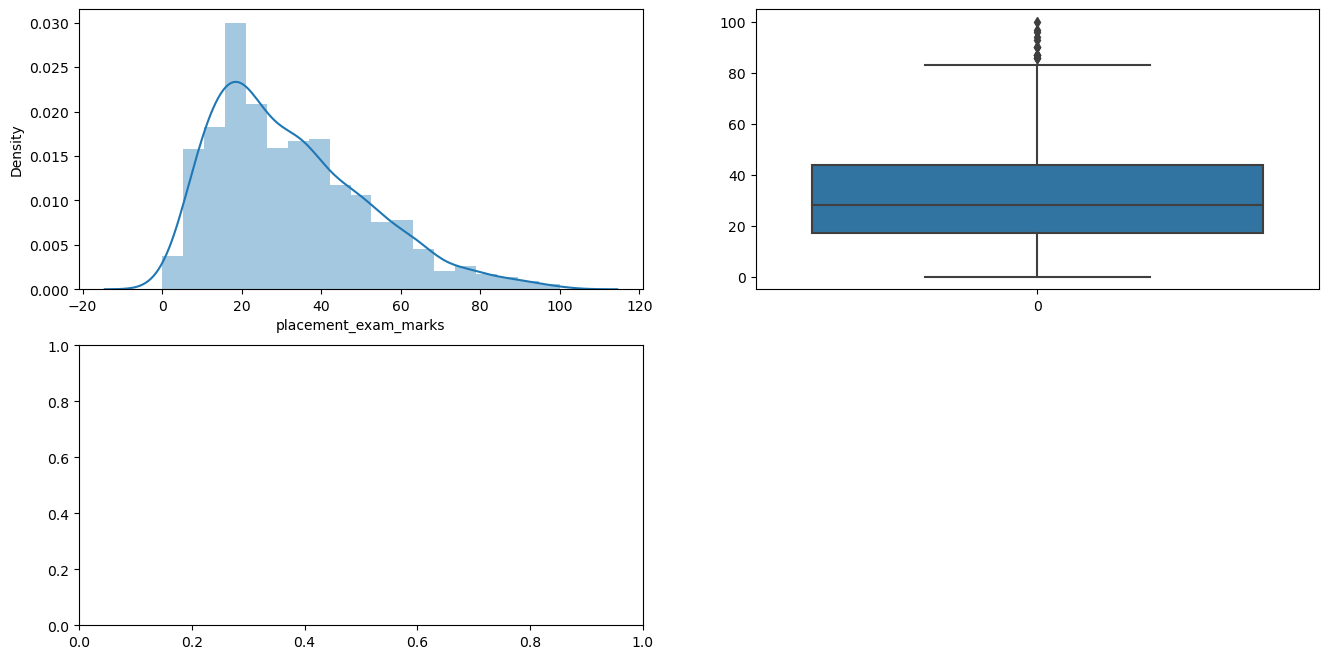

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df['placement_exam_marks'])

plt.show()

In [6]:
# Finding IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

iqr = percentile75-percentile25

minimum = percentile25 - 1.5*iqr
maximum = percentile75 + 1.5*iqr

In [7]:
df[(df['placement_exam_marks']<minimum)|(df['placement_exam_marks']>maximum)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
# Trimming
df_new = df[~((df['placement_exam_marks']<minimum)|(df['placement_exam_marks']>maximum))]
print(df_new.shape)
display(df_new.head(2))

(1000, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


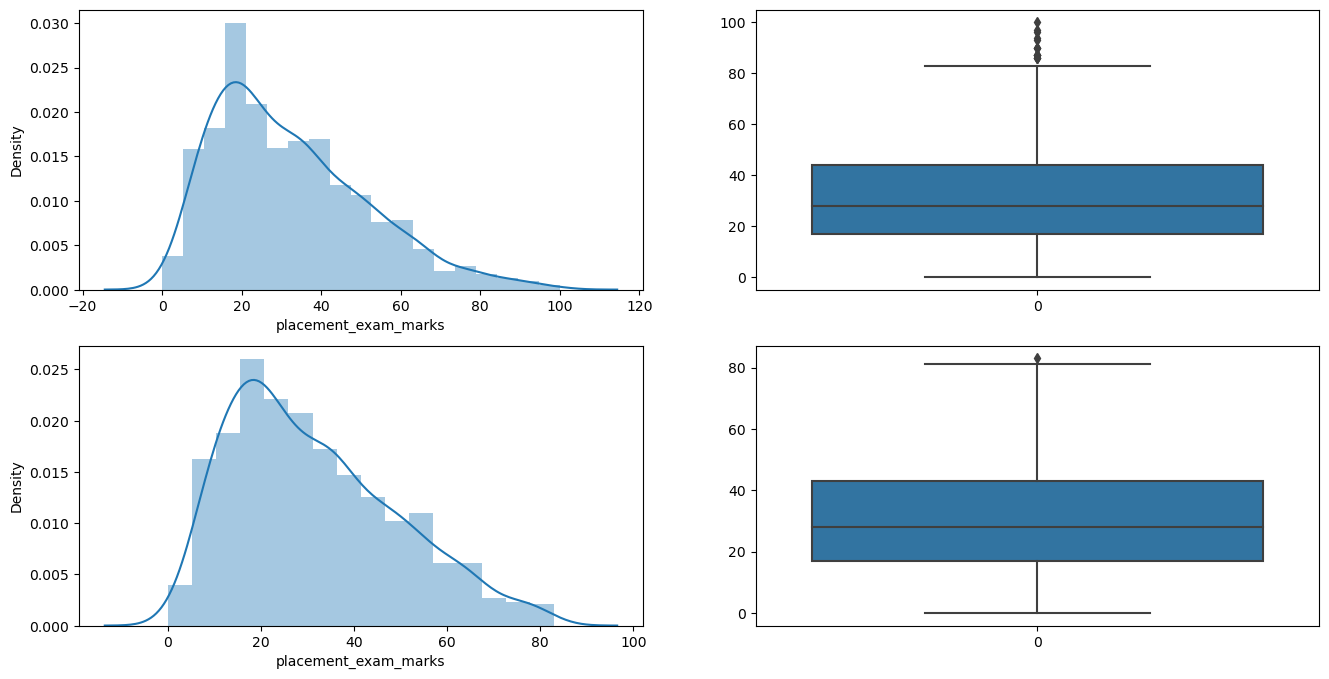

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df_new['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df_new['placement_exam_marks'])

plt.show()

In [15]:

# Clipping
df_copy = df.copy()
df_copy['placement_exam_marks'] = np.where(df_copy['placement_exam_marks']>maximum,maximum,
                                  np.where(df_copy['placement_exam_marks']<minimum,minimum,df_copy['placement_exam_marks']))
print(df_copy.shape)
display(df_copy.head(2))

(1000, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
